In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

loan_data = pd.read_csv(r"C:\Users\SHREE\Downloads\Python CODES\Loan Status Prediction using ML\loan_train.csv")
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
loan_data.shape

(614, 13)

In [3]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [6]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
loan_data['Gender']= loan_data['Gender'].map({'Male':0, 'Female':1})
loan_data['Married']= loan_data['Married'].map({'No':0, 'Yes':1})
loan_data['Loan_Status']= loan_data['Loan_Status'].map({'N':0, 'Y':1})

In [8]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,0.0,1.0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0.0,1.0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0.0,1.0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0.0,0.0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [9]:
loan_data['Gender'] = loan_data['Gender'].fillna(loan_data['Gender'].mode()[0])

In [10]:
loan_data['Married'] = loan_data['Married'].fillna(loan_data['Married'].mode()[0])

In [11]:
loan_data['Dependents'] = loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0])

In [12]:
loan_data['Self_Employed'].fillna('No',inplace=True)

In [13]:
loan_data['Credit_History'] = loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode())

In [14]:
loan_data['LoanAmount'] = loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median())

In [15]:
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mean())

In [16]:
loan_data['Gender'].value_counts()

0.0    502
1.0    112
Name: Gender, dtype: int64

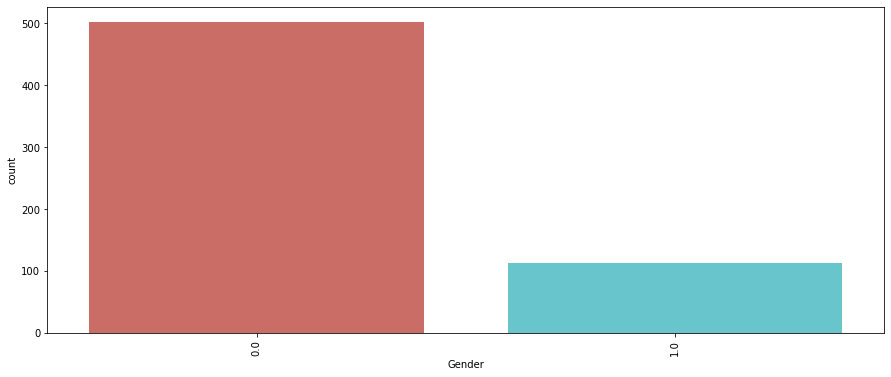

In [17]:
plt.figure(figsize=(15,6))
sns.countplot('Gender', data = loan_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [18]:
loan_data['LoanAmount'].value_counts()

128.0    33
120.0    20
110.0    17
100.0    15
160.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [19]:
loan_data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

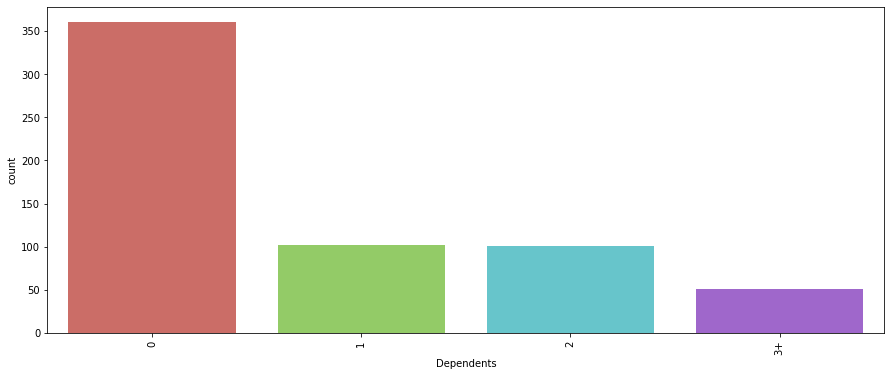

In [20]:
plt.figure(figsize=(15,6))
sns.countplot('Dependents', data = loan_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [21]:
loan_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

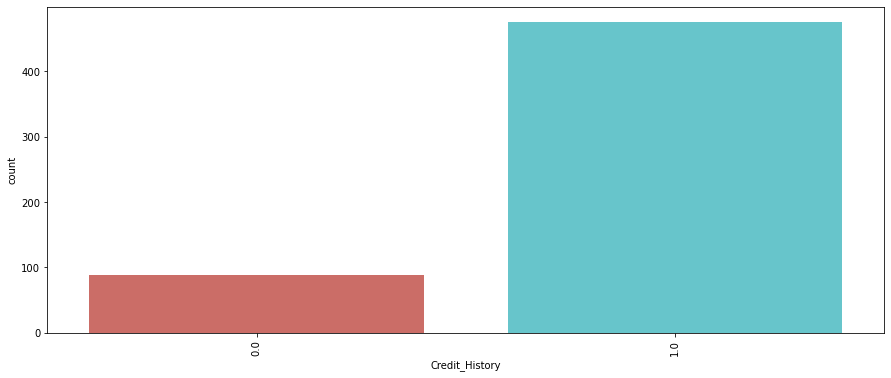

In [22]:
plt.figure(figsize=(15,6))
sns.countplot('Credit_History', data = loan_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [23]:
loan_data['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

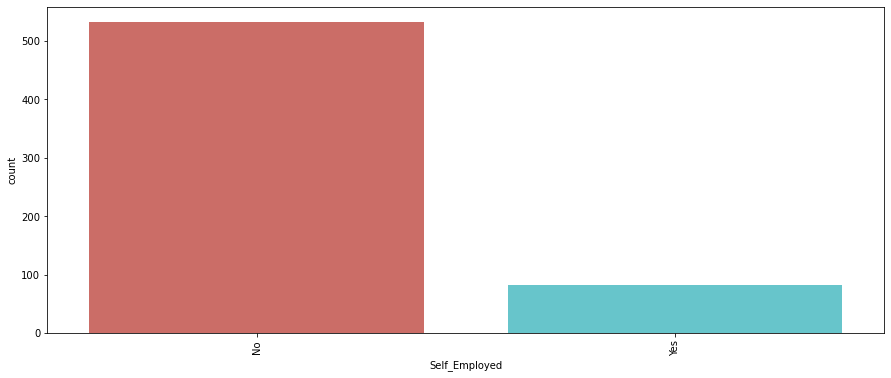

In [24]:
plt.figure(figsize=(15,6))
sns.countplot('Self_Employed', data = loan_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [25]:
loan_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

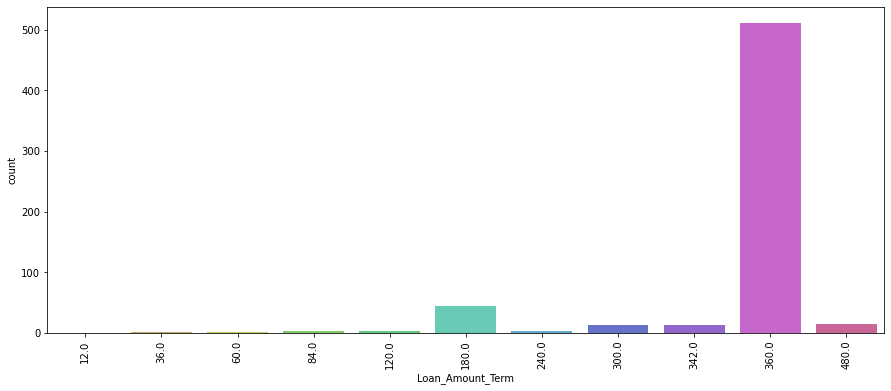

In [26]:
plt.figure(figsize=(15,6))
sns.countplot('Loan_Amount_Term', data = loan_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

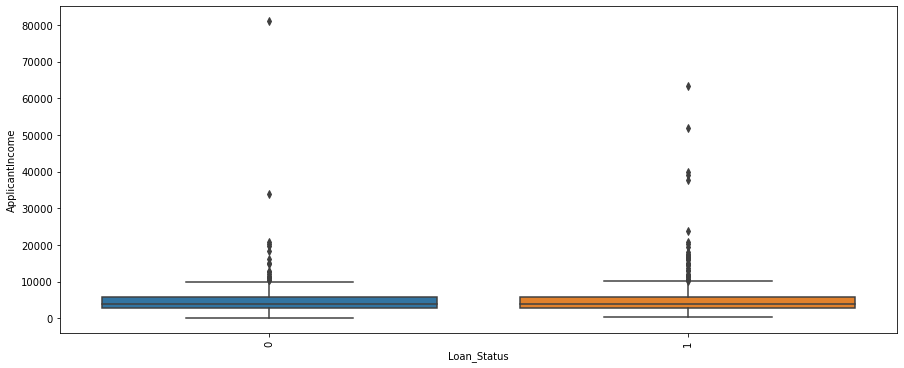

In [27]:
plt.figure(figsize=(15,6))
sns.boxplot(x = 'Loan_Status', y = 'ApplicantIncome', data = loan_data)
plt.xticks(rotation = 90)
plt.show()

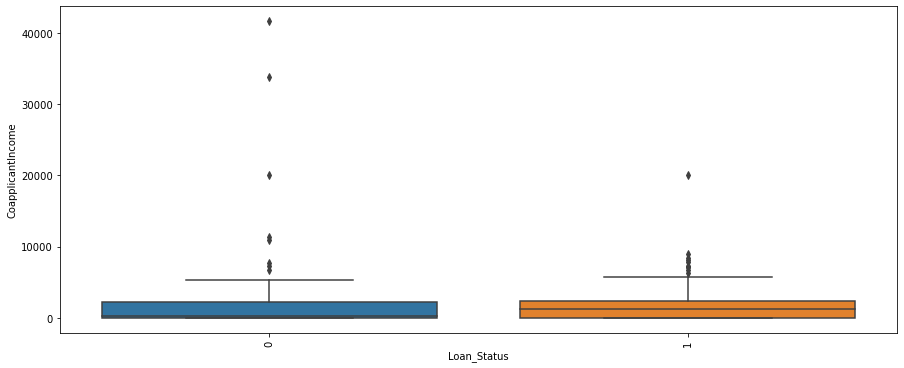

In [28]:
plt.figure(figsize=(15,6))
sns.boxplot(x = 'Loan_Status', y = 'CoapplicantIncome', data = loan_data)
plt.xticks(rotation = 90)
plt.show()

<Figure size 1080x432 with 0 Axes>

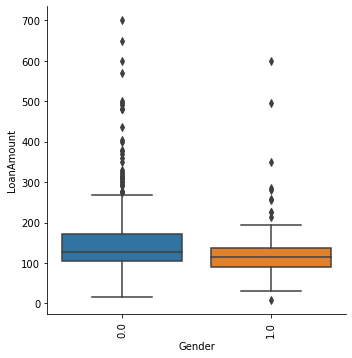

In [29]:
plt.figure(figsize=(15,6))
sns.catplot(x = 'Gender', y = 'LoanAmount', data = loan_data, kind = 'box')
plt.xticks(rotation = 90)
plt.show()

In [30]:
loan_data = loan_data.dropna()

In [31]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,0.0,1.0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0.0,1.0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0.0,1.0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0.0,0.0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [32]:
X = loan_data[['Gender', 'Married', 'ApplicantIncome', 'LoanAmount',
'Credit_History']]
y = loan_data.Loan_Status

In [33]:
X.shape, y.shape

((564, 5), (564,))

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size = 0.2,
random_state = 10)

In [35]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=4, random_state = 10)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, random_state=10)

In [36]:
from sklearn.metrics import accuracy_score

pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8495575221238938

In [37]:
pred_train = model.predict(x_train)
accuracy_score(y_train,pred_train)

0.8137472283813747